In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('data/0Xf5QSSF2b.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='view', save_prefix='example', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

In [2]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(3, 150, 150), data_format="channels_first"))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))

model.add(Conv2D(32, (3, 3), data_format="channels_first"))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=1))
model.add(MaxPooling2D(pool_size=(2, 2), data_format="channels_first"))

model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('linear'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 148, 148)      896       
_________________________________________________________________
activation (Activation)      (None, 32, 148, 148)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 148, 148)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 74, 74)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 72, 72)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 72, 72)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 72, 72)        1

In [3]:
from tensorflow.python.keras.applications.vgg16 import VGG16
from tensorflow.python.keras.preprocessing import image
from tensorflow.python.keras.applications.vgg16 import preprocess_input
from tensorflow.python.keras.layers import Input, Flatten, Dense
from tensorflow.python.keras.models import Model
import numpy as np

#Get back the convolutional part of a VGG network trained on ImageNet
model_vgg16_conv = VGG16(weights='imagenet', include_top=False) # data_format = "channels_first"
model_vgg16_conv.summary()

#Create your own input format (here 3x200x200)
input = Input(shape=(200,200,3),name = 'image_input')

#Use the generated model 
output_vgg16_conv = model_vgg16_conv(input)

#Add the fully-connected layers 
x = Flatten(name='flatten')(output_vgg16_conv)
x = Dense(4096, activation='relu', name='fc1')(x)
x = Dense(4096, activation='relu', name='fc2')(x)
x = Dense(1, activation='linear', name='pred')(x)

#Create your own model 
my_model = Model(input=input, output=x)

#In the summary, weights and layers from VGG part will be hidden, but they will be fit during the training
my_model.summary()


#Then training with your data ! 

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

TypeError: ('Keyword argument not understood:', 'input')

In [5]:
# load data into dataframe with 'path' and 'target' columns
import pandas as pd
train_label_df = pd.read_csv('data.csv', delimiter=' ', header=1, names=["uid"])
train_label_df["path"] = train_label_df['uid'].apply(lambda x : 'data/' + x.split(',')[-1][1:].split('/')[-1])
train_label_df["target"] = train_label_df['uid'].apply(lambda x : int(x.split(',')[1])/int(x.split(',')[2]))
train_label_df =train_label_df.drop(['uid'], axis=1)

train_label_df2 = pd.read_csv('data_temp.csv', delimiter=' ', header=1, names=["uid"])
train_label_df2["path"] = train_label_df2['uid'].apply(lambda x : "data/" + x.split(',')[0] + ".jpg")
train_label_df2["target"] = train_label_df2['uid'].apply(lambda x : int(x.split(',')[1])/int(x.split(',')[3]))
train_label_df2 =train_label_df2.drop(['uid'], axis=1)
#uid,likes,comments,followers
#B-A-bW9l1Gm,601,43,6715

In [12]:
train_df = pd.concat([train_label_df, train_label_df2], axis=0).reset_index().drop(['index'], axis=1)

(-10, 10)

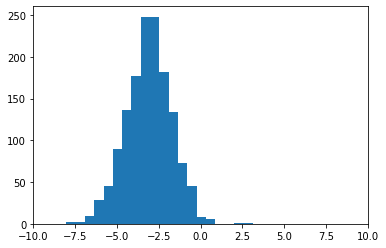

In [7]:
import matplotlib.pyplot as plt
from math import log
a = train_df['target'].to_numpy()
b = [log(x) for x in a]
plt.hist(b, bins = 20)
plt.xlim((-10, 10))

In [8]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir('data/') if isfile(join('data/', f))]
onlyfiles[465:470]

['B-AGwr4ptTT.jpg',
 'B-AGHiOoDHa.jpg',
 'B9evW7aFWlk.jpg',
 'B-IxnLDF7-z.jpg',
 'B9__DisD6r5.jpg']

In [9]:
'B-ITyGwnb6p.jpg' in onlyfiles

True

In [13]:
train_df

,path,target
0,data/B9dZzI1n-EV.jpg,0.112025
1,data/B9cQMfVnkMe.jpg,0.638448
2,data/B9a0IQWnY9M.jpg,0.053981
3,data/B9NnTUrHoNX.jpg,0.143885
4,data/B9XuP83gx_j.jpg,0.030143
...,...,...
1429,data/B9M_-rNg0Er.jpg,0.289023
1430,data/B9WejSrBIsL.jpg,0.917219
1431,data/B9wPREWhq0l.jpg,0.128363
1432,data/B9Y_fqoHwUn.jpg,0.286299


In [14]:
new_df = train_df
j = 0
for i in train_df['path']:
    #print(i.split("/")[-1])
    if i.split("/")[-1] not in onlyfiles:
        new_df = new_df.drop(train_df.index[train_df['path'] == i].tolist())
    else:
      j+=1
train_df = new_df.reset_index()
# All are found
train_df

,index,path,target
0,0,data/B9dZzI1n-EV.jpg,0.112025
1,1,data/B9cQMfVnkMe.jpg,0.638448
2,2,data/B9a0IQWnY9M.jpg,0.053981
3,3,data/B9NnTUrHoNX.jpg,0.143885
4,4,data/B9XuP83gx_j.jpg,0.030143
...,...,...,...
1429,1429,data/B9M_-rNg0Er.jpg,0.289023
1430,1430,data/B9WejSrBIsL.jpg,0.917219
1431,1431,data/B9wPREWhq0l.jpg,0.128363
1432,1432,data/B9Y_fqoHwUn.jpg,0.286299


In [17]:
batch_size = 32
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=5,
    
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_df,
        x_col = 'path',
        y_col = 'target',
        # directory='data',
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='other',
       #  preprocessing_function=lambda x: x print(x)
)  # since we use binary_crossentropy loss, we need binary labels

Found 1434 validated image filenames.


In [18]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())  

['/device:CPU:0', '/device:XLA_CPU:0']


In [19]:
model.fit_generator(
        train_generator,
        steps_per_epoch=1400,
        epochs=50,
        #validation_data=validation_generator,
        #validation_steps=800 // batch_size)
        verbose = 2,
        use_multiprocessing=False
)
model.save_weights('first_try.h5')

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 1400 steps
Epoch 1/50


InvalidArgumentError:  Default MaxPoolingOp only supports NHWC on device type CPU
	 [[node sequential/max_pooling2d/MaxPool (defined at <ipython-input-19-59a524f18573>:8) ]] [Op:__inference_distributed_function_2463]

Function call stack:
distributed_function
